## LIBRARIES IMPORT

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np
import pickle #saving the model
from warnings import simplefilter
import warnings
warnings.filterwarnings('ignore')

## DATA IMPORT

In [315]:
df = pd.read_csv("PC-SM.csv")

In [317]:
df.head()

,ID,PS1,PS2,PS3,PS4,PS5,PS6,PS7,PS8,PS9,...,PLT6,PLT7,Gender,Age,MS,RL,PI,Education Level,ED,COO
0,1,4,2,4,4,4,4,4,4,2,...,4,4,2,1,3,1,1,5,5,3
1,2,4,3,3,3,3,3,4,3,2,...,4,4,2,1,1,1,1,5,2,3
2,3,5,4,4,4,3,4,5,3,3,...,4,5,1,2,3,1,6,5,1,3
3,4,5,2,3,3,3,3,4,3,1,...,4,4,1,1,1,1,2,4,5,3
4,5,4,4,4,4,3,3,3,3,3,...,2,2,1,1,1,1,2,5,5,3


In [319]:
df.isnull().sum()

ID                 0
PS1                0
PS2                0
PS3                0
PS4                0
PS5                0
PS6                0
PS7                0
PS8                0
PS9                0
SMUT1              0
SMUT2              0
SMUT3              0
SMUT4              0
SMUT5              0
SMUT6              0
SMUT7              0
SMUT8              0
SMUT9              0
OSC1               0
OSC2               0
OSC3               0
OSC4               0
OSC5               0
OSC6               0
VONP 1             0
VONP2              0
VONP3              0
VONP4              0
VONP5              0
VONP6              0
VONP7              0
VONP8              0
VOFP1              0
VOFP2              0
VOFP3              0
VOFP4              0
VOFP5              0
VOFP6              0
VOFP7              0
PLT1               0
PLT2               0
PLT3               0
PLT4               0
PLT5               0
PLT6               0
PLT7               0
Gender       

In [321]:
df.describe()

,ID,PS1,PS2,PS3,PS4,PS5,PS6,PS7,PS8,PS9,...,PLT6,PLT7,Gender,Age,MS,RL,PI,Education Level,ED,COO
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,...,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,236.500000,3.682203,2.872881,2.985169,3.273305,3.086864,3.097458,3.283898,2.838983,2.747881,...,3.167373,2.847458,1.381356,2.241525,2.150424,2.497881,4.758475,4.483051,2.942797,1.985169
std,136.398925,1.277214,1.394844,1.390670,1.246433,1.350818,1.364952,1.436525,1.375987,1.384627,...,1.062563,1.101068,0.486235,1.248750,1.342052,2.199207,2.455751,1.019829,2.428360,0.815060
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,118.750000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000
50%,236.500000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.500000,...,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,6.500000,4.000000,1.000000,2.000000
75%,354.250000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,7.000000,5.000000,5.000000,3.000000
max,472.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,2.000000,6.000000,7.000000,8.000000,7.000000,8.000000,10.000000,3.000000


## DATA PRE-PROCESSING

In [324]:
df2 = df.drop(['ID'], axis=1)

In [328]:
df2['PS'] = df2['PS1'] + df2['PS2']+ df2['PS3']+ df2['PS4'] + df2['PS5'] + df2['PS6'] + df2['PS7'] + df2['PS8'] + df2['PS9']

In [330]:
rating = []
for row in df2['PS']:
    if row<27:
        rating.append('WEAK')
    else:
        rating.append('STRONG')
df2['PS_Level'] = rating

In [332]:
df2['PS_Level'].value_counts()

PS_Level
STRONG    276
WEAK      196
Name: count, dtype: int64

In [334]:
df3 = df2.drop(columns = ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'PS7', 'PS8', 'PS9', 'PS'],inplace = True)

In [336]:
df2.columns

Index(['SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT7', 'SMUT8',
       'SMUT9', 'OSC1', 'OSC2', 'OSC3', 'OSC4', 'OSC5', 'OSC6', 'VONP 1',
       'VONP2', 'VONP3', 'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1',
       'VOFP2', 'VOFP3', 'VOFP4', 'VOFP5', 'VOFP6', 'VOFP7', 'PLT1', 'PLT2',
       'PLT3', 'PLT4', 'PLT5', 'PLT6', 'PLT7', 'Gender', 'Age', 'MS', 'RL',
       'PI', 'Education Level', 'ED', 'COO', 'PS_Level'],
      dtype='object')

In [338]:
X = df2.drop(columns = ['PS_Level'])
y = df2['PS_Level']

In [340]:
feature_names = X.columns.tolist()
print(feature_names)

['SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT7', 'SMUT8', 'SMUT9', 'OSC1', 'OSC2', 'OSC3', 'OSC4', 'OSC5', 'OSC6', 'VONP 1', 'VONP2', 'VONP3', 'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1', 'VOFP2', 'VOFP3', 'VOFP4', 'VOFP5', 'VOFP6', 'VOFP7', 'PLT1', 'PLT2', 'PLT3', 'PLT4', 'PLT5', 'PLT6', 'PLT7', 'Gender', 'Age', 'MS', 'RL', 'PI', 'Education Level', 'ED', 'COO']


## HOLD-OUT VALIDATION

In [343]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df2['PS_Level'] = le.fit_transform(df2['PS_Level'])

In [345]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 29)

## FEATURE SELECTION

### Pearson's Correlation

In [349]:
corr = X_train.corr()
corr

,SMUT1,SMUT2,SMUT3,SMUT4,SMUT5,SMUT6,SMUT7,SMUT8,SMUT9,OSC1,...,PLT6,PLT7,Gender,Age,MS,RL,PI,Education Level,ED,COO
SMUT1,1.000000,0.674468,0.528124,0.617088,0.585238,0.689832,0.690419,0.679087,0.675572,0.445016,...,0.167548,0.003267,0.093610,0.115018,0.085631,0.283191,-0.149733,0.070299,-0.062870,-0.309548
SMUT2,0.674468,1.000000,0.709930,0.801500,0.687116,0.739696,0.755673,0.568636,0.627700,0.433938,...,0.083459,-0.041374,0.146779,0.173852,0.156529,0.275107,-0.161488,0.059207,-0.080512,-0.328707
SMUT3,0.528124,0.709930,1.000000,0.749794,0.660904,0.639671,0.647376,0.510862,0.572112,0.539452,...,0.113007,0.032288,0.089718,0.112050,0.088588,0.257380,-0.116810,0.030125,-0.019225,-0.253730
SMUT4,0.617088,0.801500,0.749794,1.000000,0.717266,0.779349,0.737242,0.568952,0.599555,0.457180,...,0.092923,-0.057215,0.112728,0.147573,0.084862,0.267813,-0.148672,0.040801,-0.063756,-0.306081
SMUT5,0.585238,0.687116,0.660904,0.717266,1.000000,0.687380,0.643200,0.543604,0.539377,0.443544,...,0.166958,-0.012715,0.060989,0.080841,0.071280,0.303290,-0.189223,0.013804,-0.081233,-0.301872
SMUT6,0.689832,0.739696,0.639671,0.779349,0.687380,1.000000,0.875468,0.642467,0.727185,0.455391,...,0.086995,-0.062794,0.055930,0.076998,0.076136,0.198362,-0.151918,0.065670,-0.037243,-0.205289
SMUT7,0.690419,0.755673,0.647376,0.737242,0.643200,0.875468,1.000000,0.643547,0.753634,0.445507,...,0.046260,-0.061915,0.076013,0.090948,0.074825,0.204287,-0.138401,0.050014,-0.014693,-0.204510
SMUT8,0.679087,0.568636,0.510862,0.568952,0.543604,0.642467,0.643547,1.000000,0.798189,0.421622,...,0.089426,-0.015245,0.151345,0.072572,0.048353,0.183911,-0.078330,0.055497,-0.059686,-0.248464
SMUT9,0.675572,0.627700,0.572112,0.599555,0.539377,0.727185,0.753634,0.798189,1.000000,0.407073,...,0.072089,0.001053,0.126050,0.058778,0.064734,0.176614,-0.098340,0.073282,-0.008909,-0.196890
OSC1,0.445016,0.433938,0.539452,0.457180,0.443544,0.455391,0.445507,0.421622,0.407073,1.000000,...,0.112964,0.087820,0.007293,0.039468,0.052840,0.146249,-0.060918,-0.030672,0.054728,-0.072214


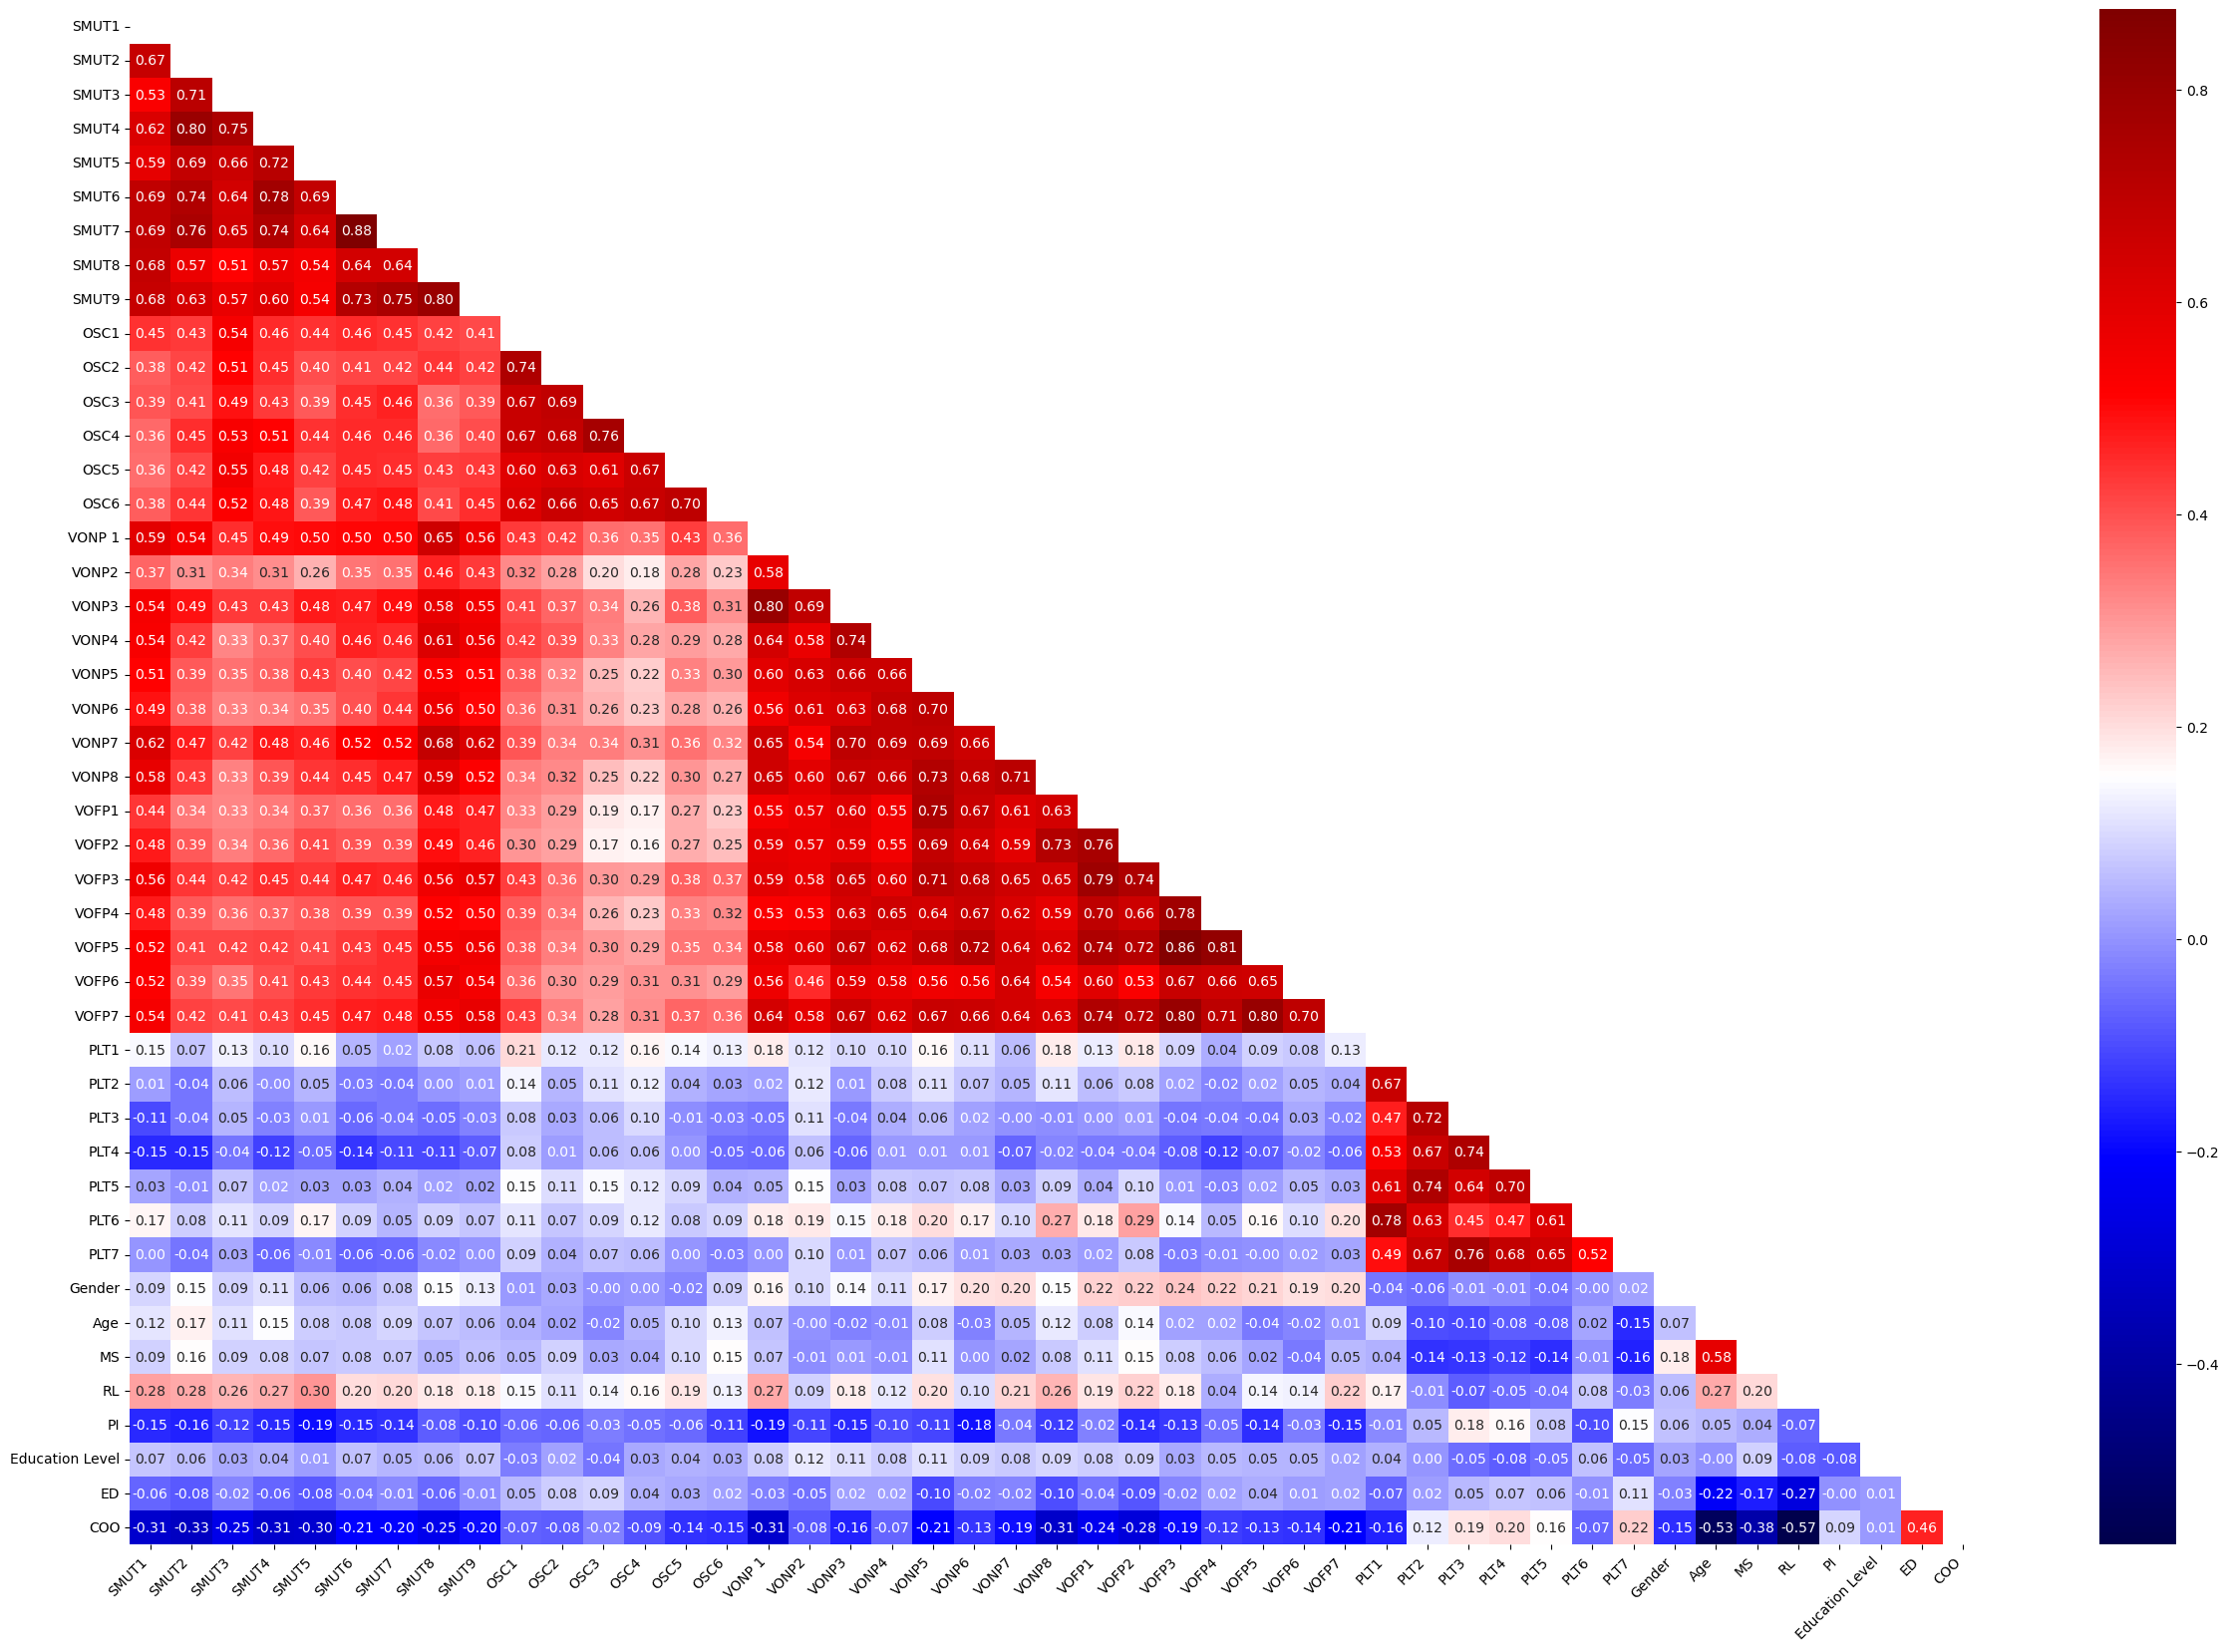

<Figure size 640x480 with 0 Axes>

In [351]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(30, 20))
sns.heatmap(
    corr, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    cmap="seismic", 
    annot_kws={"size": 10}
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [352]:
correlation_matrix = X_train.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

threshold = 0.85
corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print(f'Number of correlated features: {len(corr_features)}')
print(corr_features)

Number of correlated features: 2
['SMUT7', 'VOFP5']


In [355]:
print(f"Number of features in X_train before dropping: {X_train.shape[1]}")
print(f"Number of features in X_test before dropping: {X_test.shape[1]}")

# Drop the correlated features from the dataset
X_train = X_train.drop(columns=corr_features, errors='ignore')
X_test = X_test.drop(columns=corr_features, errors='ignore')

print(f"Number of features dropped: {len(corr_features)}")
print(f"Remaining features in X_train: {X_train.shape[1]}")
print(f"Remaining features in X_test: {X_test.shape[1]}")


Number of features in X_train before dropping: 45
Number of features in X_test before dropping: 45
Number of features dropped: 2
Remaining features in X_train: 43
Remaining features in X_test: 43


### Using Information Gain

In [358]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train, random_state = 29)
mutual_info

array([0.17145724, 0.13912565, 0.07374366, 0.1257097 , 0.18185334,
       0.16911243, 0.16853178, 0.17715861, 0.11567635, 0.11730947,
       0.08751273, 0.03396279, 0.06621004, 0.05333194, 0.10220463,
       0.12396033, 0.12783636, 0.14476186, 0.18097332, 0.14082461,
       0.18205197, 0.14920395, 0.15534213, 0.15487696, 0.24410066,
       0.16501866, 0.16913726, 0.21707015, 0.01811952, 0.        ,
       0.03415044, 0.05283129, 0.02552608, 0.01650829, 0.01370756,
       0.0178946 , 0.00335058, 0.03440589, 0.        , 0.0247137 ,
       0.03192069, 0.00947236, 0.        ])

In [360]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

VOFP3              0.244101
VOFP7              0.217070
VONP7              0.182052
SMUT5              0.181853
VONP5              0.180973
SMUT9              0.177159
SMUT1              0.171457
VOFP6              0.169137
SMUT6              0.169112
SMUT8              0.168532
VOFP4              0.165019
VOFP1              0.155342
VOFP2              0.154877
VONP8              0.149204
VONP4              0.144762
VONP6              0.140825
SMUT2              0.139126
VONP3              0.127836
SMUT4              0.125710
VONP2              0.123960
OSC2               0.117309
OSC1               0.115676
VONP 1             0.102205
OSC3               0.087513
SMUT3              0.073744
OSC5               0.066210
OSC6               0.053332
PLT4               0.052831
MS                 0.034406
PLT3               0.034150
OSC4               0.033963
Education Level    0.031921
PLT5               0.025526
PI                 0.024714
PLT1               0.018120
Gender             0

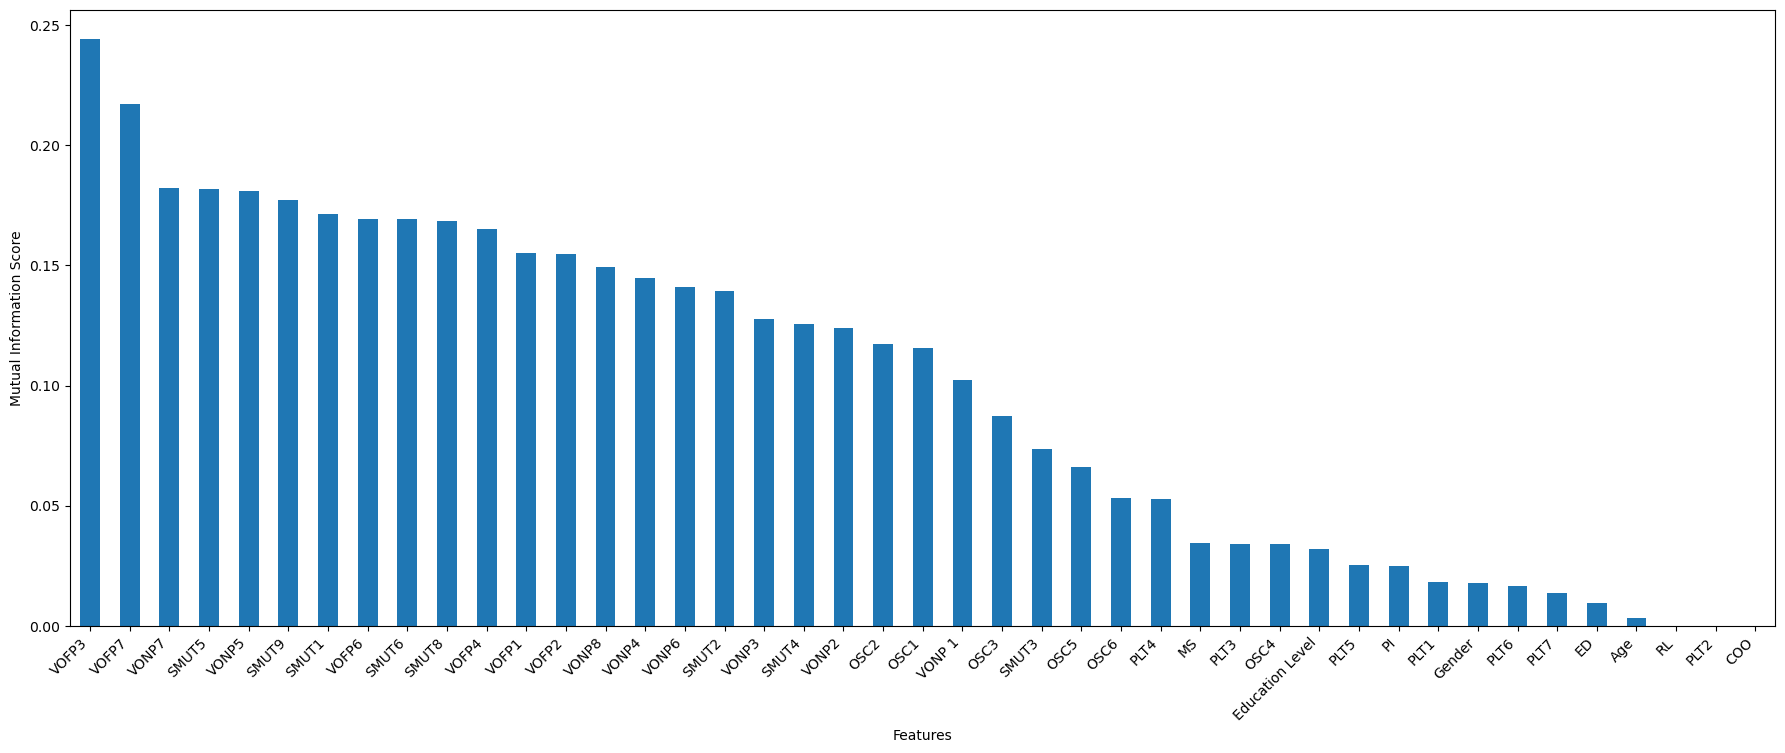

In [362]:
plt.figure(figsize = (22, 8))
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
mutual_info.sort_values(ascending = False).plot.bar()
plt.xticks(rotation=45, ha='right');

In [364]:
threshold = 0.035
features_to_drop = mutual_info[mutual_info < threshold].index

#Drop these features from the dataset
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

print(f"Features dropped (MI < {threshold}): {list(features_to_drop)}")
print("Remaining features after dropping:")
print(X_train.columns)


Features dropped (MI < 0.035): ['OSC4', 'PLT1', 'PLT2', 'PLT3', 'PLT5', 'PLT6', 'PLT7', 'Gender', 'Age', 'MS', 'RL', 'PI', 'Education Level', 'ED', 'COO']
Remaining features after dropping:
Index(['SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT8', 'SMUT9',
       'OSC1', 'OSC2', 'OSC3', 'OSC5', 'OSC6', 'VONP 1', 'VONP2', 'VONP3',
       'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1', 'VOFP2', 'VOFP3',
       'VOFP4', 'VOFP6', 'VOFP7', 'PLT4'],
      dtype='object')


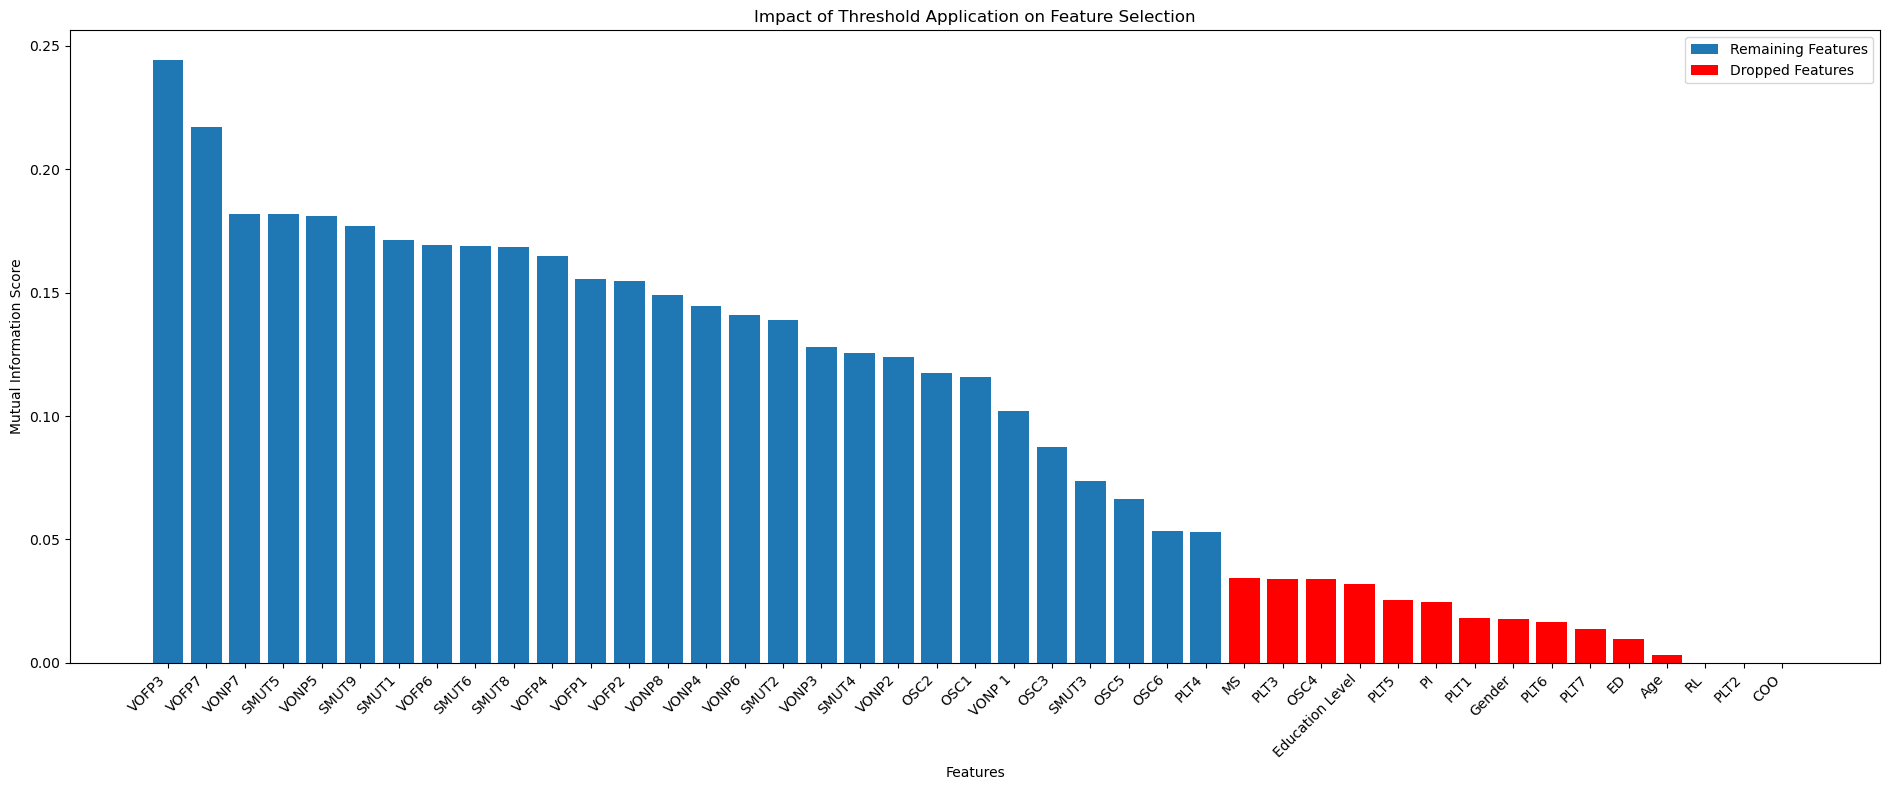

In [366]:
mutual_info = mutual_info.sort_values(ascending=False)
threshold = 0.035  

retained_features = mutual_info[mutual_info >= threshold]
dropped_features = mutual_info[mutual_info < threshold]

plt.figure(figsize=(19, 8))
plt.bar(retained_features.index, retained_features.values, color='#1f77b4', label='Remaining Features')
plt.bar(dropped_features.index, dropped_features.values, color='red', label='Dropped Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Impact of Threshold Application on Feature Selection')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## TRAINING OF MACHINE LEARNING MODELS

### ZeroR Classifier


Classification Report:
              precision    recall  f1-score   support

      STRONG       0.55      1.00      0.71        52
        WEAK       0.00      0.00      0.00        43

    accuracy                           0.55        95
   macro avg       0.27      0.50      0.35        95
weighted avg       0.30      0.55      0.39        95



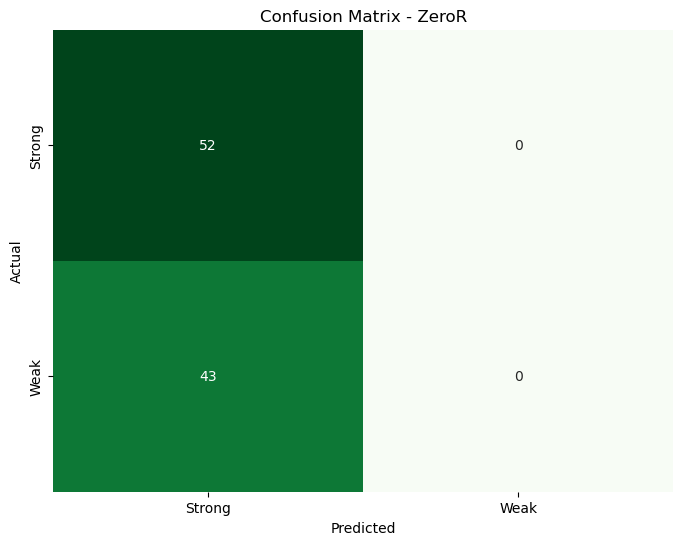

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report

zeroR = DummyClassifier(strategy='most_frequent', random_state=29)
zeroR.fit(X_train, y_train)
y_pred = zeroR.predict(X_test)

#Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Strong', 'Weak'], yticklabels=['Strong', 'Weak'], cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - ZeroR')
plt.show()

### Decision Tree Classifier

Classification Report:
               precision    recall  f1-score   support

      STRONG       0.81      0.92      0.86        52
        WEAK       0.89      0.74      0.81        43

    accuracy                           0.84        95
   macro avg       0.85      0.83      0.84        95
weighted avg       0.85      0.84      0.84        95

Train Accuracy:  0.9549071618037135
Test Accuracy:  0.8421052631578947


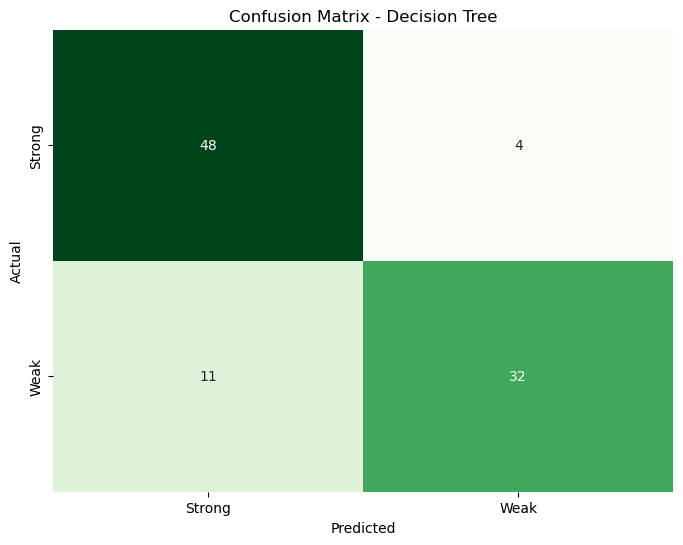

In [376]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

dt_clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_split= 2, random_state= 28)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

#Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dt_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",xticklabels=['Strong', 'Weak'], yticklabels=['Strong', 'Weak'], cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

### Learning Curve

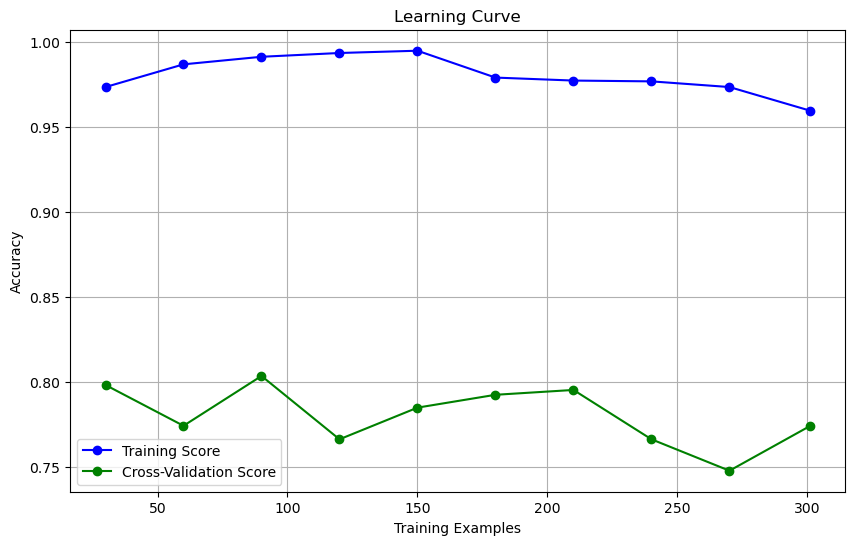

In [379]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

#To plot the learning curve
def plot_learning_curve(estimator, X, y, cv=5, scoring="accuracy"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    #Compute mean and standard deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(dt_clf, X_train, y_train, cv=5, scoring="accuracy")


### ROC Curve

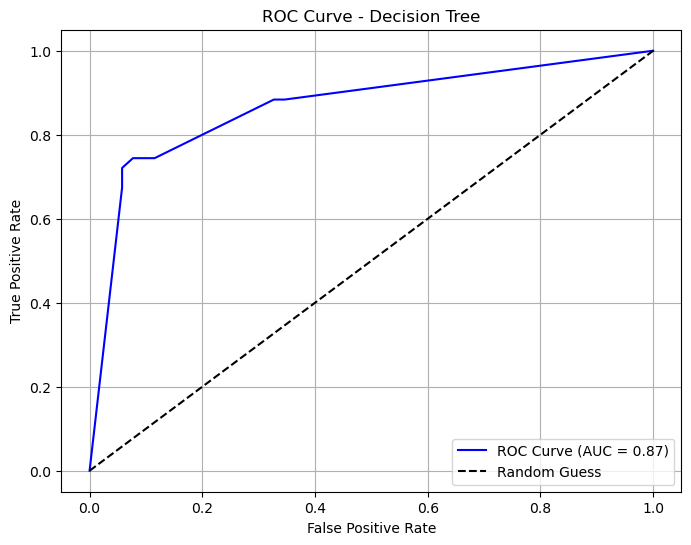

In [382]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

y_pred_proba = dt_clf.predict_proba(X_test)[:, 1]  
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test) 

#Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label="Random Guess") 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Precision-Recall Curve (PRC)

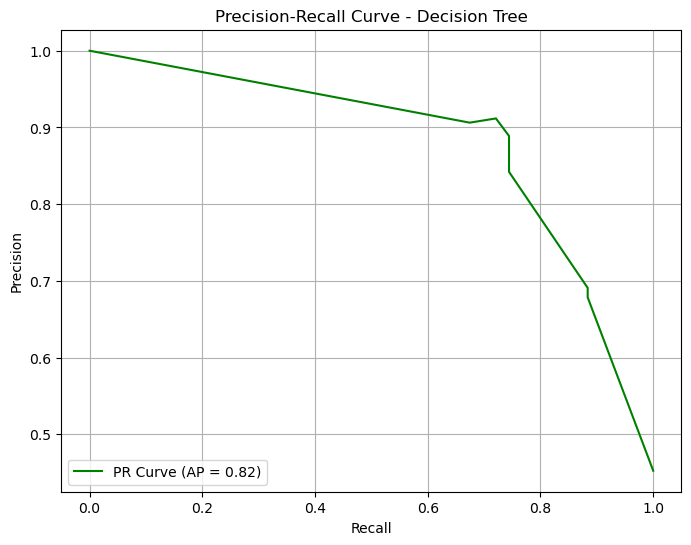

In [385]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test) 

#Calculate the PRC curve
precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_pred_proba)
average_precision = average_precision_score(y_test_encoded, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {average_precision:.2f})', color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend(loc="lower left")
plt.grid()
plt.show()

### K-Nearest Neighbors classifier

Classification Report:
               precision    recall  f1-score   support

      STRONG       0.80      0.94      0.87        52
        WEAK       0.91      0.72      0.81        43

    accuracy                           0.84        95
   macro avg       0.86      0.83      0.84        95
weighted avg       0.85      0.84      0.84        95

Train Accuracy:  0.8541114058355438
Test Accuracy:  0.8421052631578947


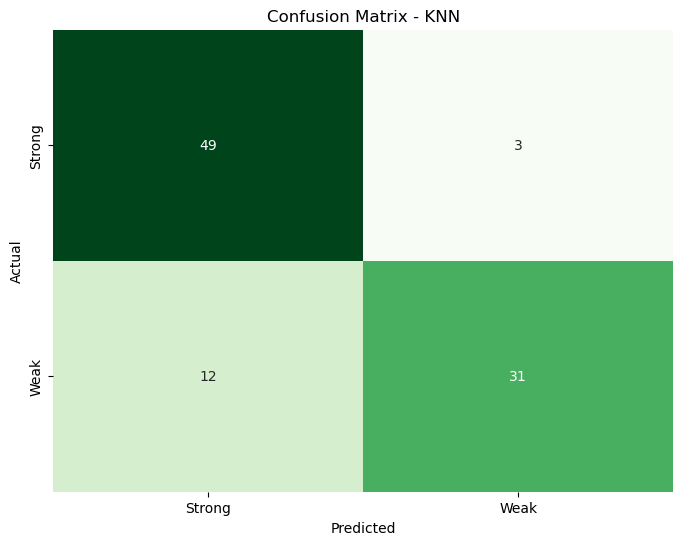

In [388]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_clf.fit(X_train, y_train)

y_pred_2 = knn_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_2))

print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_2))

cm = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Strong', 'Weak'], yticklabels=['Strong', 'Weak'],cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - KNN')
plt.show()

### Learning Curve

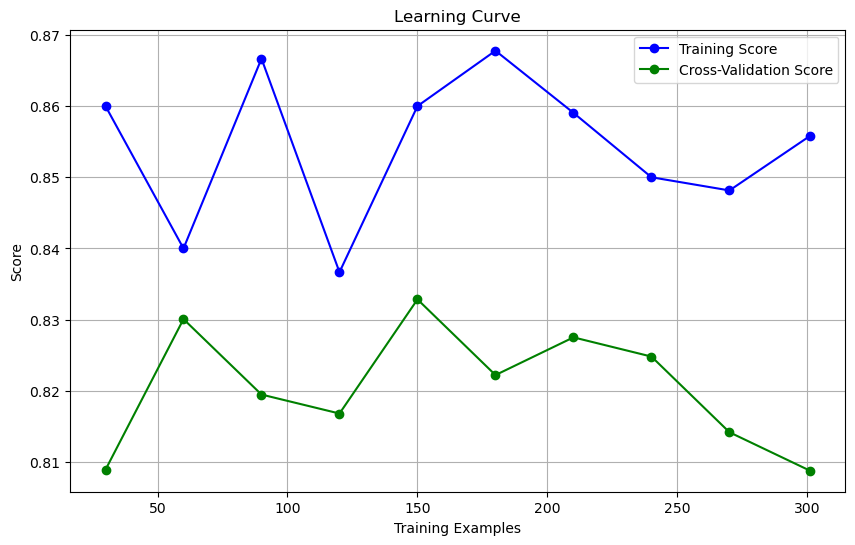

In [391]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, X, y, cv=5, scoring="accuracy"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    #Calculate the mean and standard deviations
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(knn_clf, X_train, y_train, cv=5, scoring="accuracy")


### ROC Curve

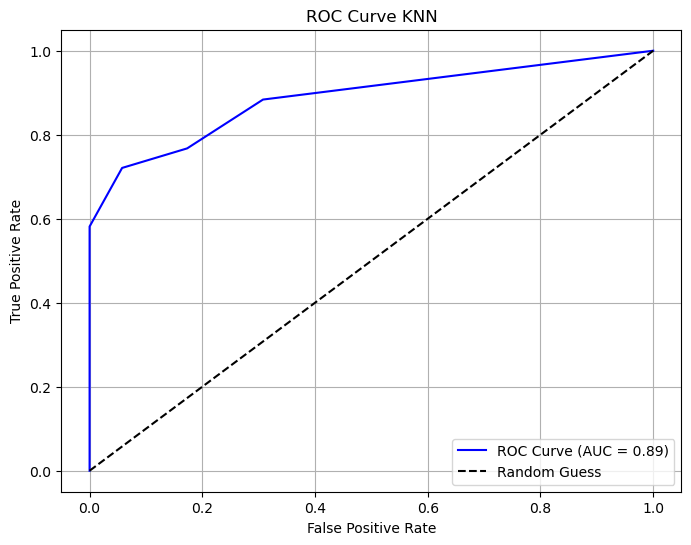

In [199]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  
y_prob = knn_clf.predict_proba(X_test)[:, 1]  

#Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = roc_auc_score(y_test_encoded, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Precision-Recall Curve (PRC)

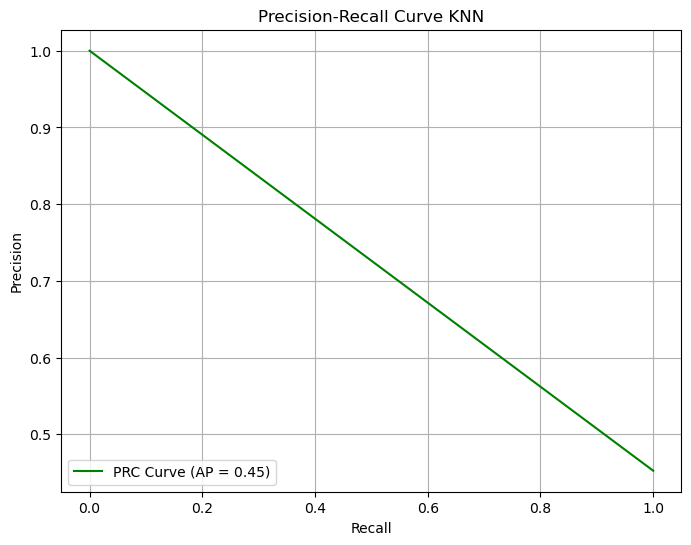

In [394]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_prob)
average_precision = average_precision_score(y_test_encoded, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PRC Curve (AP = {average_precision:.2f})', color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve KNN')
plt.legend(loc="lower left")
plt.grid()
plt.show()

### Logistic Regression Classifier

Classification Report:
               precision    recall  f1-score   support

      STRONG       0.81      0.88      0.84        52
        WEAK       0.84      0.74      0.79        43

    accuracy                           0.82        95
   macro avg       0.82      0.81      0.82        95
weighted avg       0.82      0.82      0.82        95

Train Accuracy:  0.8275862068965517
Test Accuracy:  0.8210526315789474


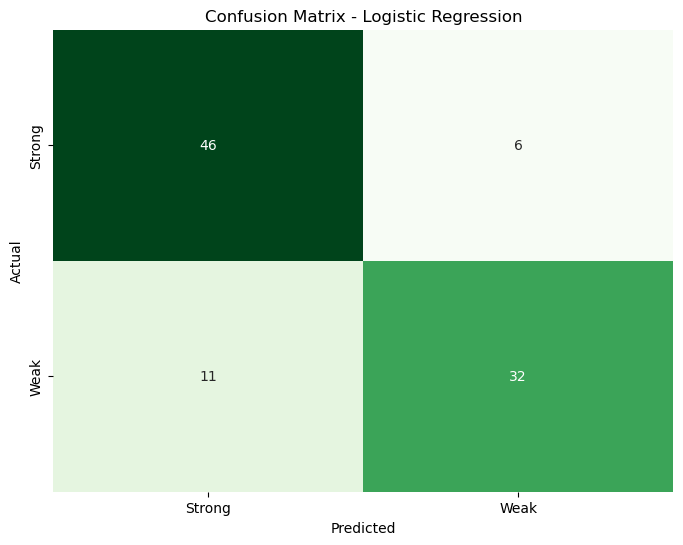

In [397]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
log_reg = LogisticRegression(C= 0.01, max_iter= 500, random_state= 29, solver= 'lbfgs')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

#Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, log_reg.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Strong', 'Weak'], yticklabels=['Strong', 'Weak'], cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Learning Curve

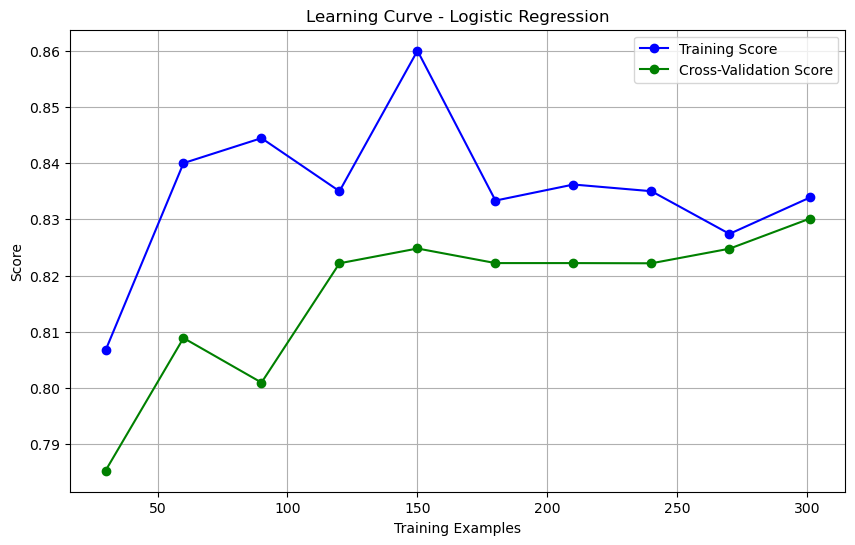

In [400]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

#To plot the learning curve
def plot_learning_curve(estimator, X, y, cv=5, scoring="accuracy"):
    # Compute learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    #Calculate mean and standard deviations
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.title('Learning Curve - Logistic Regression')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(log_reg, X_train, y_train, cv=5, scoring="accuracy")


### ROC Curve

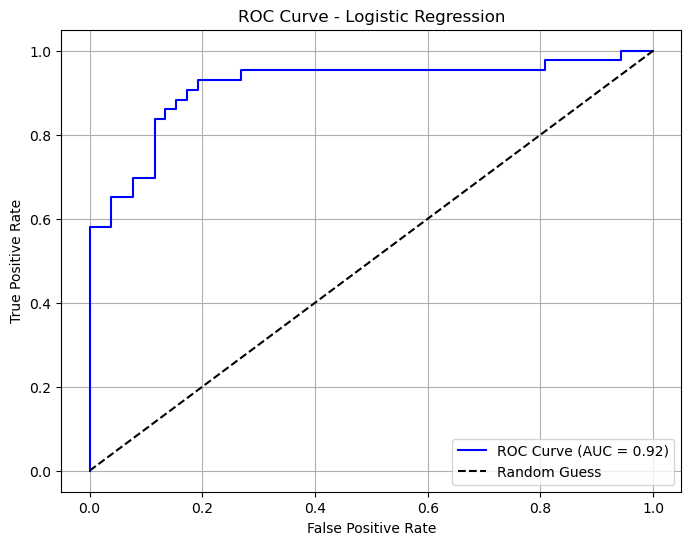

In [403]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  
y_prob = log_reg.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob) 
roc_auc = roc_auc_score(y_test_encoded, y_prob)  

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='b')  
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label="Random Guess")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Precision-Recall Curve (PRC)

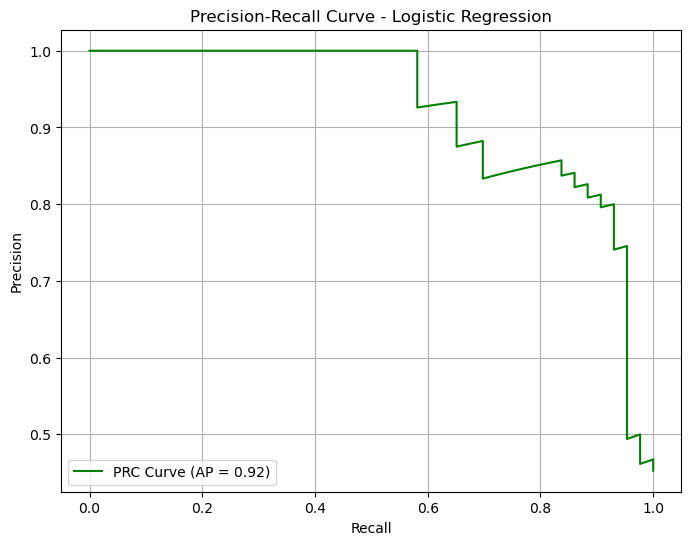

In [406]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test) 
y_prob = log_reg.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_prob)
average_precision = average_precision_score(y_test_encoded, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PRC Curve (AP = {average_precision:.2f})', color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc="lower left")
plt.grid()
plt.show()

### Gaussian Naive Bayes Classifier

Classification Report:
               precision    recall  f1-score   support

      STRONG       0.87      0.88      0.88        52
        WEAK       0.86      0.84      0.85        43

    accuracy                           0.86        95
   macro avg       0.86      0.86      0.86        95
weighted avg       0.86      0.86      0.86        95

Train Accuracy:  0.7931034482758621
Test Accuracy:  0.8631578947368421


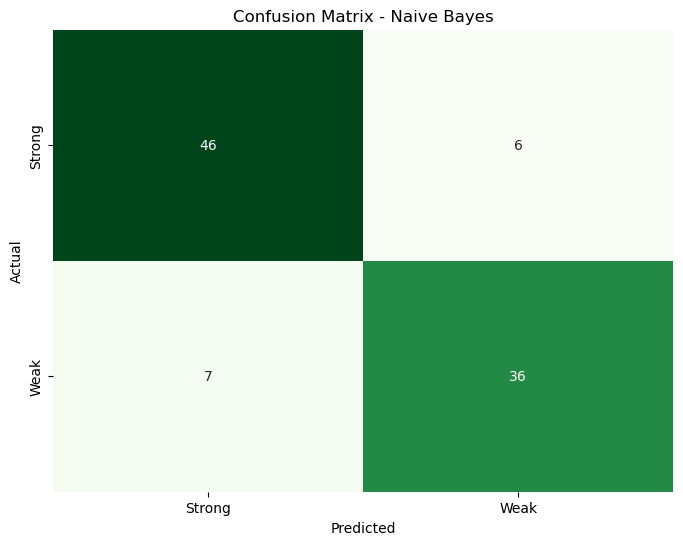

In [409]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

#Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, nb_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",xticklabels=['Strong', 'Weak'], yticklabels=['Strong', 'Weak'], cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


### Learning Curve

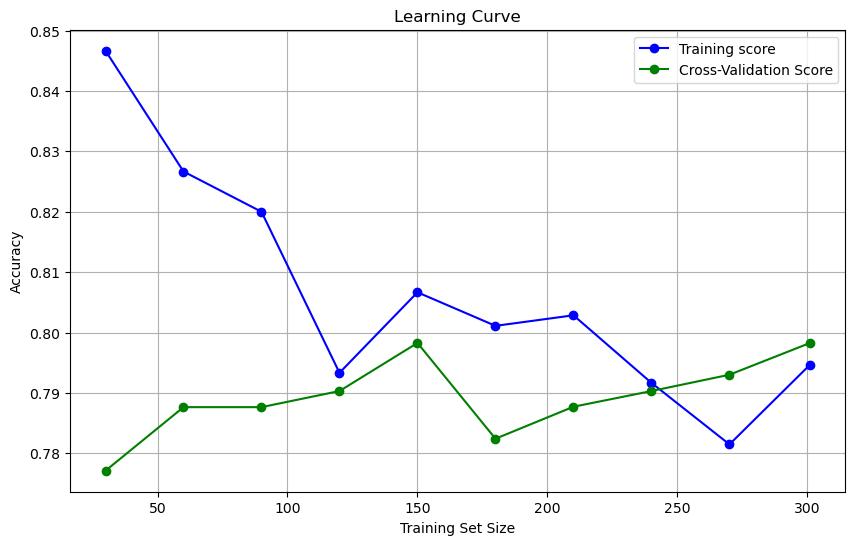

In [412]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-Validation Score")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(nb_clf, X_train, y_train, cv=5)

### ROC Curve

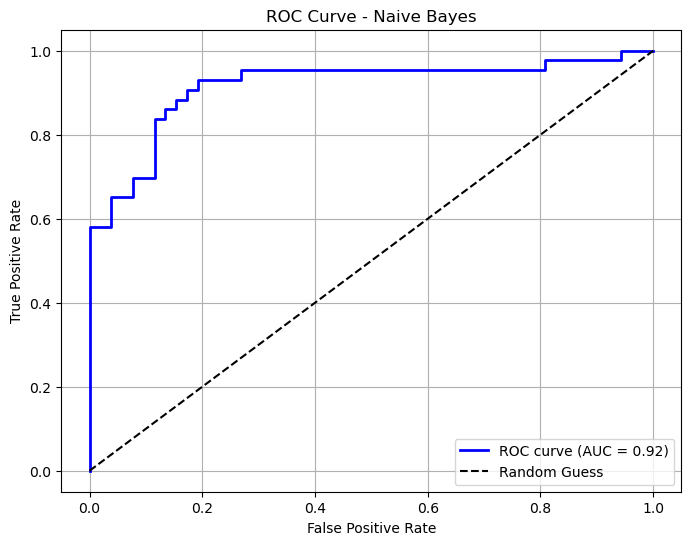

In [415]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test) 

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)  

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Precisin-Recall Curve (PRC) 

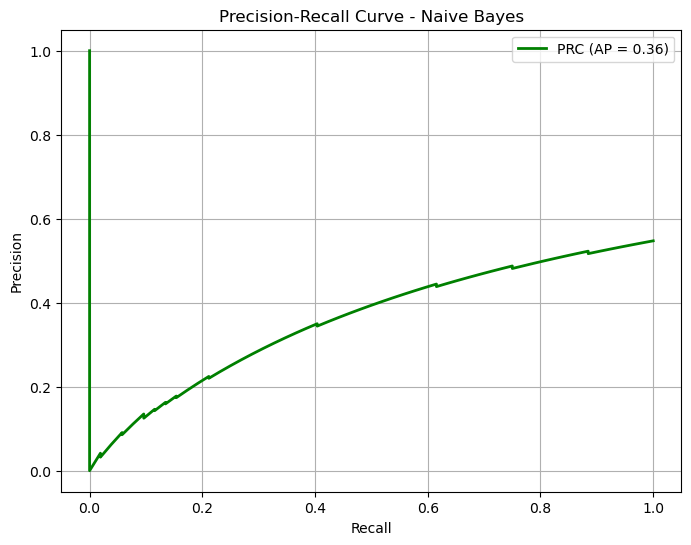

In [418]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_prob = nb_clf.predict_proba(X_test)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_test, y_prob, pos_label='STRONG')
average_precision = average_precision_score(y_test, y_prob, pos_label='STRONG')

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PRC (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Naive Bayes')
plt.legend(loc="upper right")
plt.grid()
plt.show()

### Support Vector Machine (SVM)

Classification Report:
               precision    recall  f1-score   support

      STRONG       0.77      0.92      0.84        52
        WEAK       0.88      0.67      0.76        43

    accuracy                           0.81        95
   macro avg       0.83      0.80      0.80        95
weighted avg       0.82      0.81      0.81        95

Train Accuracy:  0.9177718832891246
Test Accuracy:  0.8105263157894737


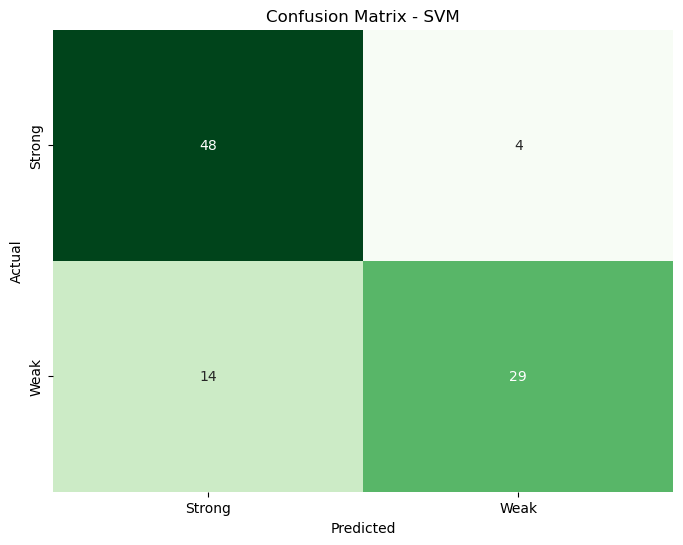

In [421]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
svm_clf = SVC(C= 1, gamma= 'auto', kernel= 'rbf', random_state=29)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

#Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, svm_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",xticklabels=['Strong', 'Weak'], yticklabels=['Strong', 'Weak'], cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

### Learning Curve

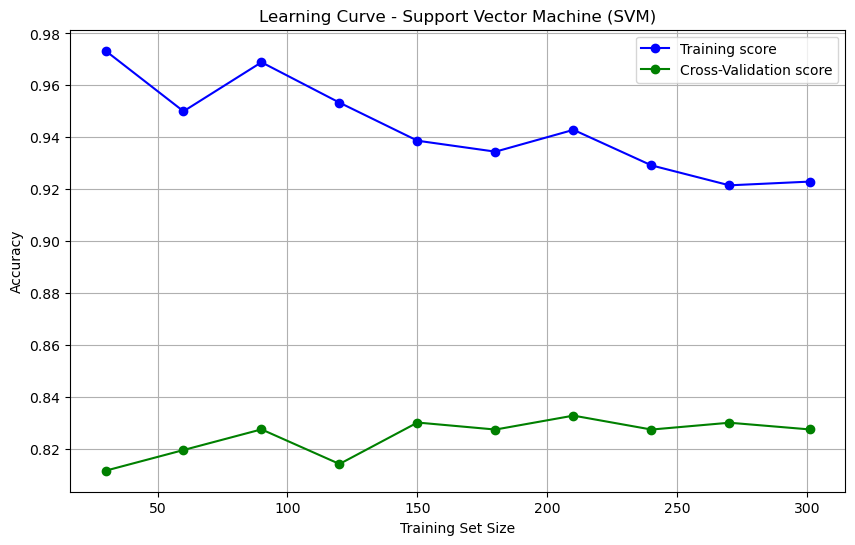

In [424]:
from sklearn.model_selection import learning_curve
import numpy as np

#To plot the learning curve
def plot_learning_curve(estimator, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )

    #Calculate the mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-Validation score")
    plt.title("Learning Curve - Support Vector Machine (SVM)")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
plot_learning_curve(svm_clf, X_train, y_train, cv=5)

### ROC Curve

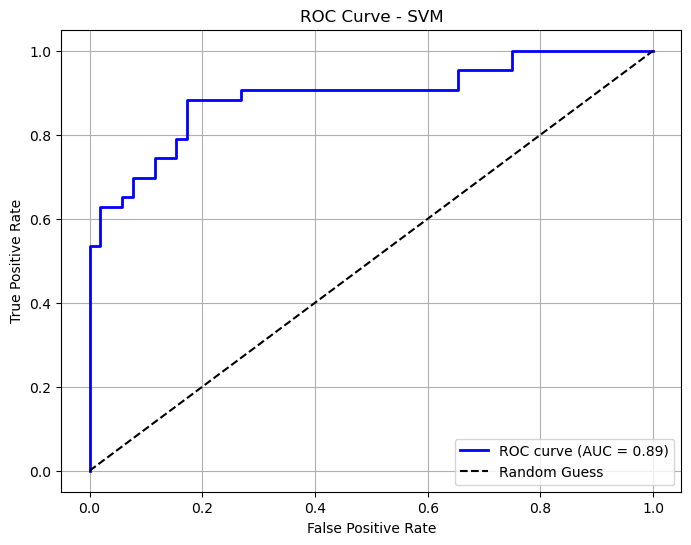

In [427]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  
y_score = svm_clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Precision-Recall Curve (PRC)

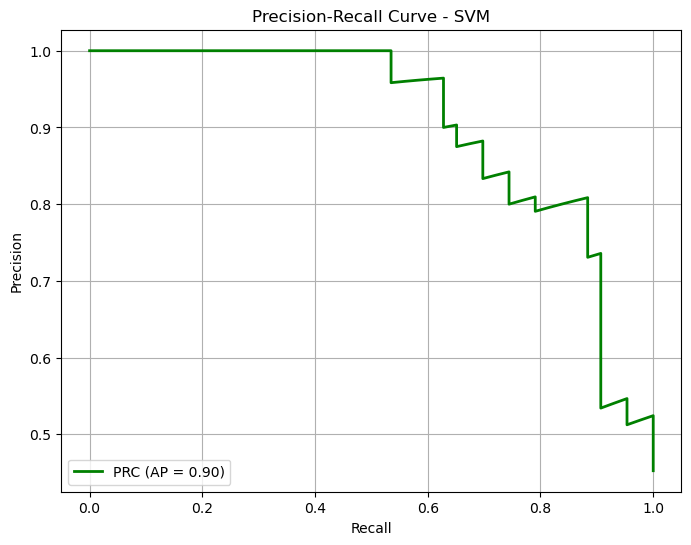

In [430]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test) 
y_score = svm_clf.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_score)
average_precision = average_precision_score(y_test_encoded, y_score)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PRC (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.legend(loc="lower left")
plt.grid()
plt.show()

### Random Forest Classifier

Classification Report:
               precision    recall  f1-score   support

      STRONG       0.83      0.92      0.87        52
        WEAK       0.89      0.77      0.82        43

    accuracy                           0.85        95
   macro avg       0.86      0.85      0.85        95
weighted avg       0.86      0.85      0.85        95

Train Accuracy:  0.9336870026525199
Test Accuracy:  0.8526315789473684


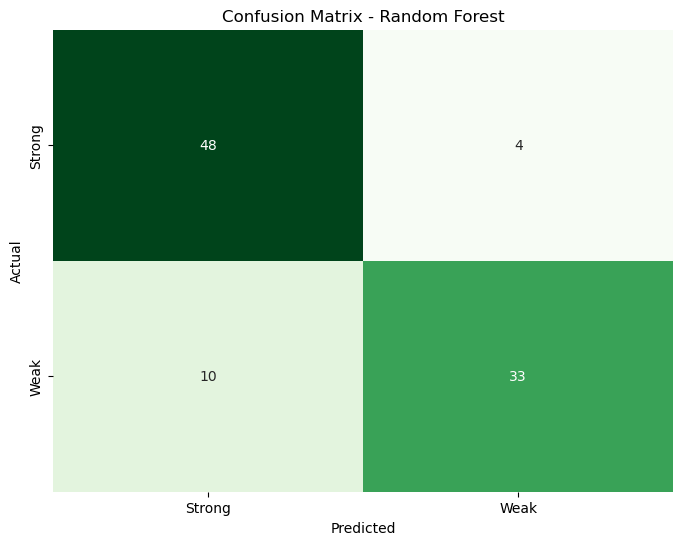

In [433]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_clf = RandomForestClassifier(max_depth=10, min_samples_split= 10, n_estimators= 100, random_state=29)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

#Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, rf_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Strong', 'Weak'], yticklabels=['Strong', 'Weak'],cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Learning Curve

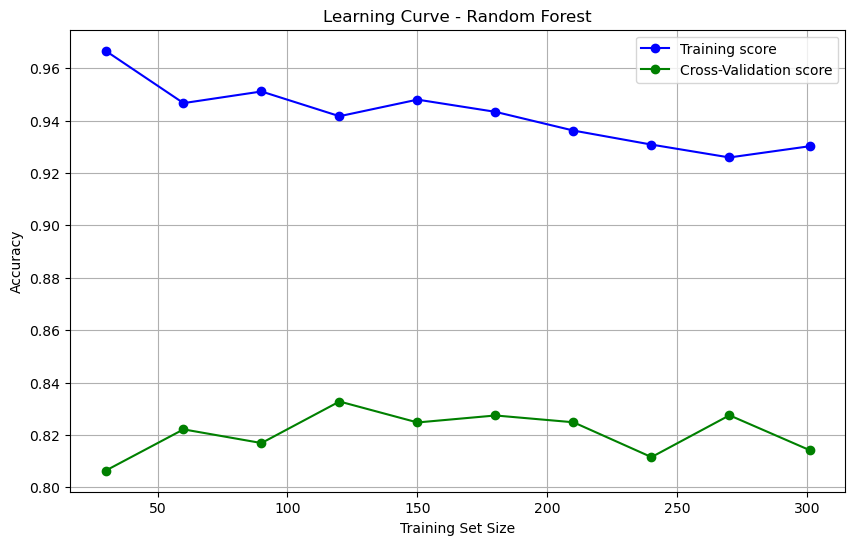

In [436]:
from sklearn.model_selection import learning_curve
import numpy as np

#To plot the learning curve
def plot_learning_curve(estimator, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )

    #Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-Validation score")
    plt.title("Learning Curve - Random Forest")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    
plot_learning_curve(rf_clf, X_train, y_train, cv=5)

### ROC Curve

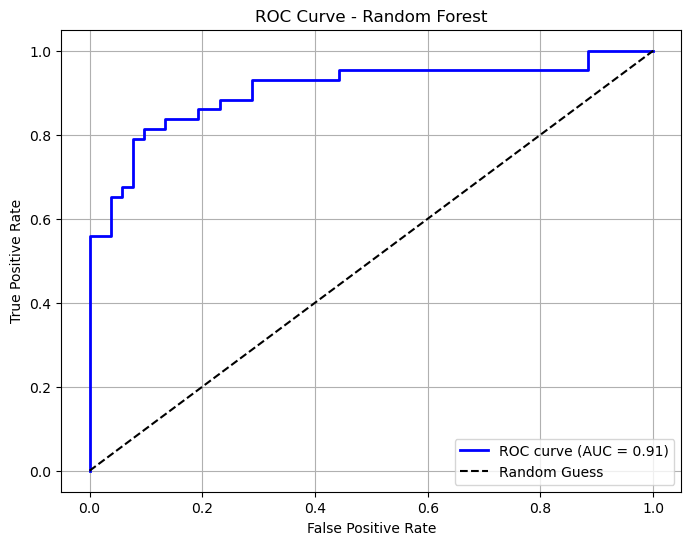

In [439]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_prob = rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Precision-Recall Curve (PRC)

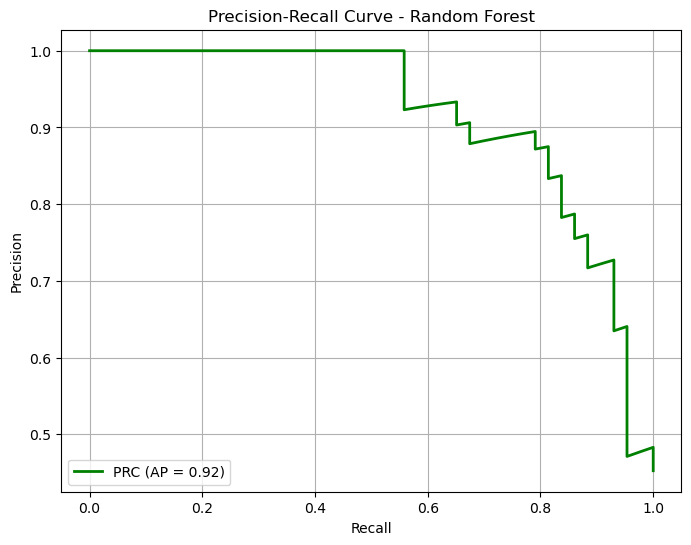

In [442]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  
y_prob = rf_clf.predict_proba(X_test)[:, 1] 
precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_prob)
average_precision = average_precision_score(y_test_encoded, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PRC (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc="lower left")
plt.grid()
plt.show()

### AdaBoost Classifier

Classification Report:
               precision    recall  f1-score   support

      STRONG       0.82      0.94      0.88        52
        WEAK       0.91      0.74      0.82        43

    accuracy                           0.85        95
   macro avg       0.87      0.84      0.85        95
weighted avg       0.86      0.85      0.85        95

Train Accuracy:  0.870026525198939
Test Accuracy:  0.8526315789473684


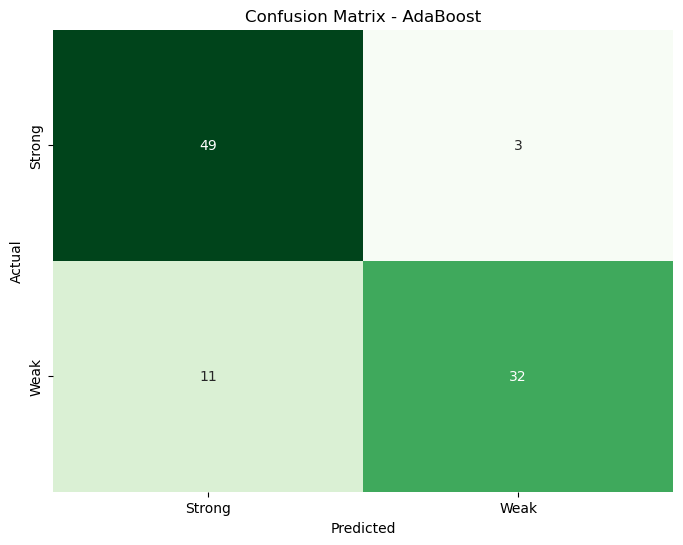

In [445]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
    learning_rate=0.01,
    n_estimators=50,
    algorithm="SAMME", #Using SAMME instead of SAMME.R to avoid warnings
    random_state=42
)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, ada_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Strong', 'Weak'], yticklabels=['Strong', 'Weak'], cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

### Learning Curve

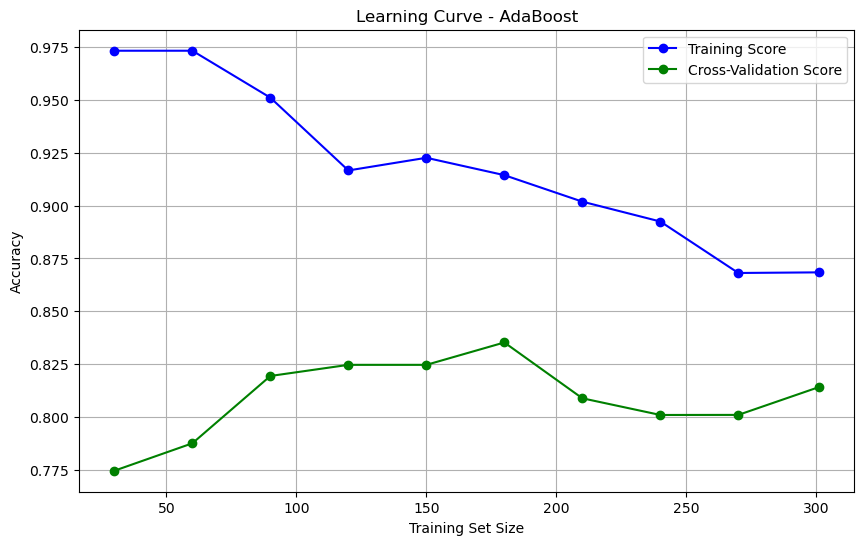

In [448]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

#To plot learning curve
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):

    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score', color='green')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve - AdaBoost')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
plot_learning_curve(ada_clf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

### ROC Curve

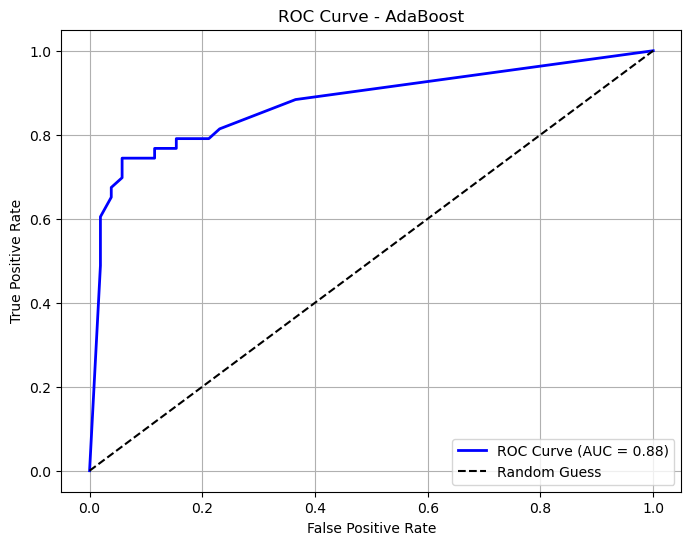

In [451]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

y_prob = ada_clf.predict_proba(X_test)[:, 1]
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  # 'WEAK' -> 0, 'STRONG' -> 1
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = roc_auc_score(y_test_encoded, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Precision-Recall Curve (PRC)

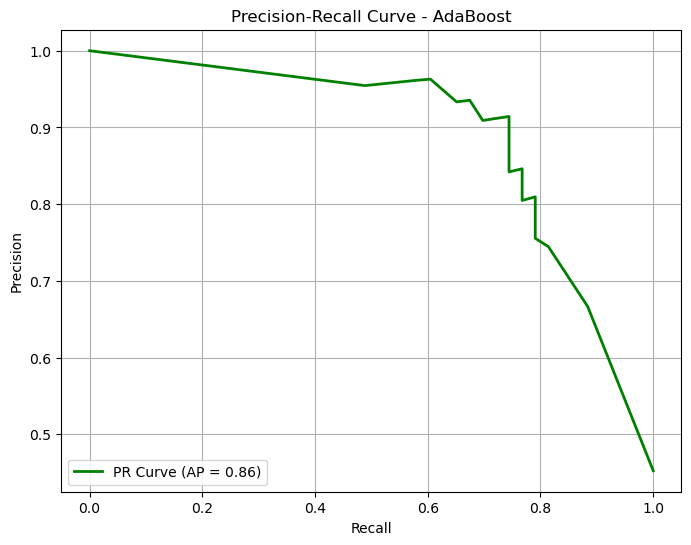

In [454]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
y_prob = ada_clf.predict_proba(X_test)[:, 1] 
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_prob)
average_precision = average_precision_score(y_test_encoded, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - AdaBoost')
plt.legend(loc="lower left")
plt.grid()
plt.show()

### Gradient Boosting Classifier

              precision    recall  f1-score   support

      STRONG       0.78      0.94      0.85        52
        WEAK       0.91      0.67      0.77        43

    accuracy                           0.82        95
   macro avg       0.84      0.81      0.81        95
weighted avg       0.84      0.82      0.82        95

Train Accuracy:  0.8594164456233422
Test Accuracy:  0.8210526315789474


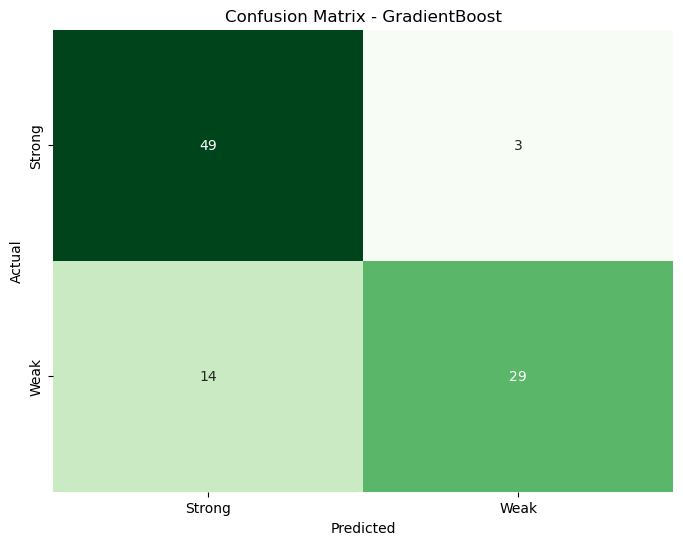

In [457]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

gb_clf = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 50, random_state= 29)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

#Print the classification report
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, gb_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Strong', 'Weak'], yticklabels=['Strong', 'Weak'],cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - GradientBoost')
plt.show()

### Learning Curve

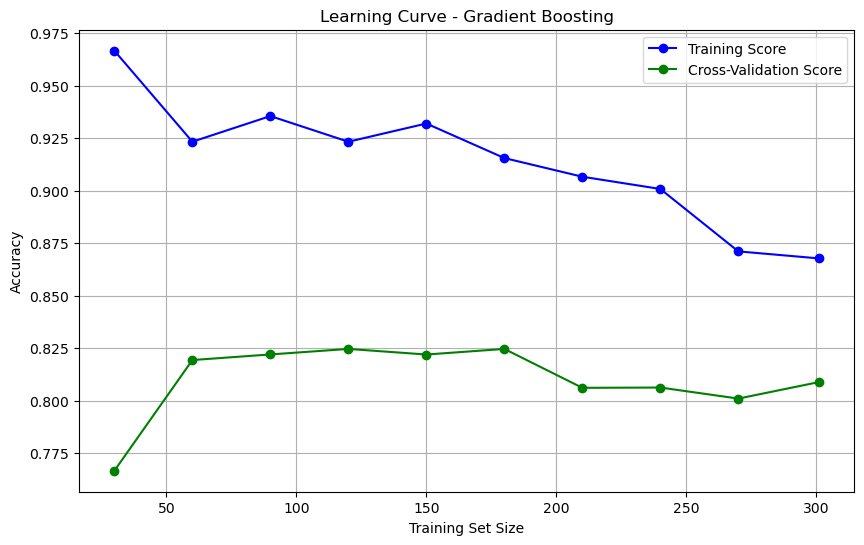

In [460]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1
    )
    
    #Calculate mean and standard deviations
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')    
    plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score', color='green')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve - Gradient Boosting')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
plot_learning_curve(gb_clf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

### ROC Curve

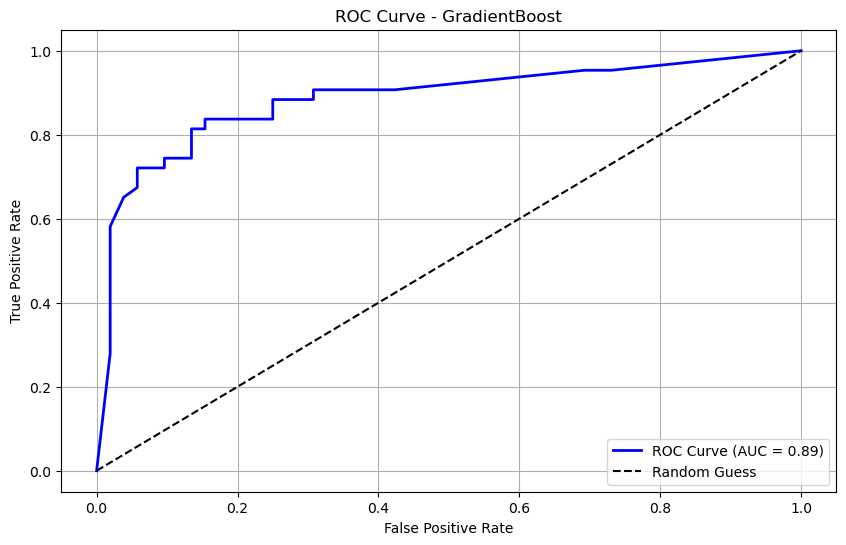

In [463]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
y_prob = gb_clf.predict_proba(X_test)[:, 1] 

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = roc_auc_score(y_test_encoded, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GradientBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Precision-recall Curve (PRC)

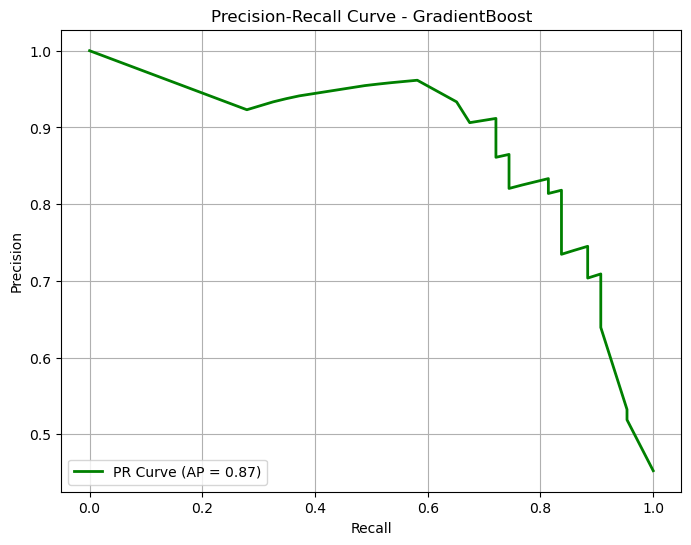

In [466]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_prob)
average_precision = average_precision_score(y_test_encoded, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - GradientBoost')
plt.legend(loc="lower left")
plt.grid()
plt.show()

### CatBoost Classifier

              precision    recall  f1-score   support

      STRONG       0.84      0.94      0.89        52
        WEAK       0.92      0.79      0.85        43

    accuracy                           0.87        95
   macro avg       0.88      0.87      0.87        95
weighted avg       0.88      0.87      0.87        95

Train Accuracy:  0.9893899204244032
Test Accuracy:  0.8736842105263158


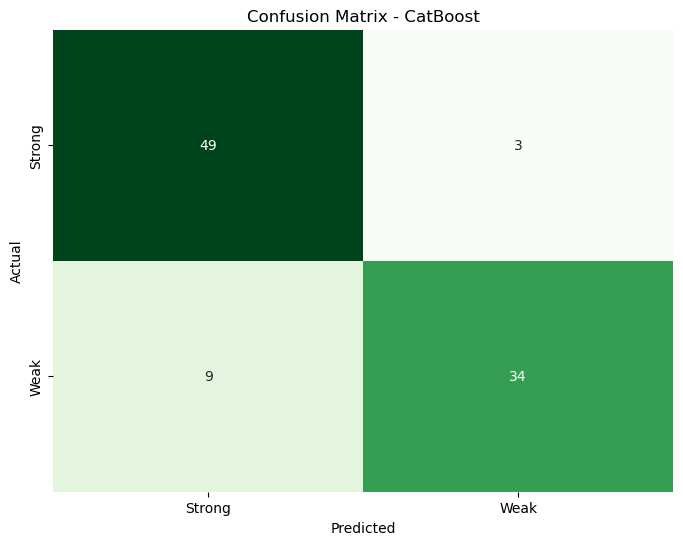

In [469]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cat_clf = CatBoostClassifier(depth= 10, iterations= 100, learning_rate= 0.1, random_state= 45, verbose=0)

cat_clf.fit(X_train, y_train)
y_pred = cat_clf.predict(X_test)
    
#Print the classification report
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, cat_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Strong', 'Weak'], yticklabels=['Strong', 'Weak'],cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - CatBoost')
plt.show()

### Learning Curve

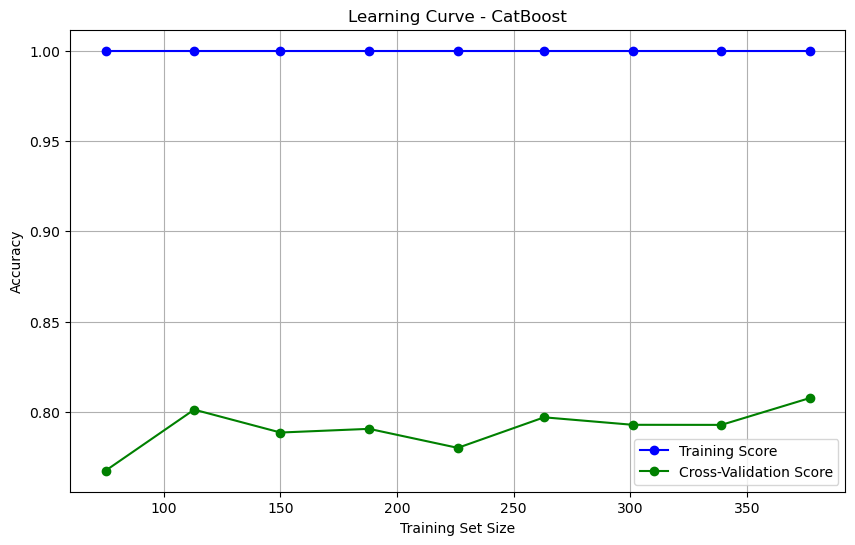

In [472]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')  
    plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score', color='green')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve - CatBoost')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
plot_learning_curve(cat_clf, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))


### ROC Curve

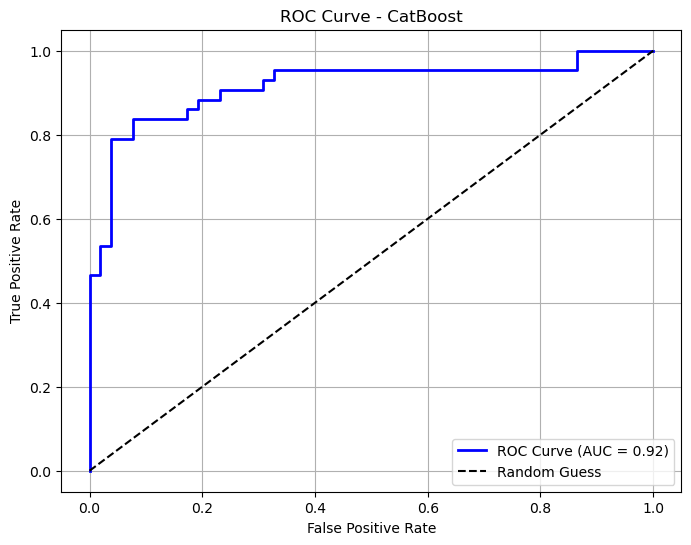

In [474]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test) 
y_prob = cat_clf.predict_proba(X_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = roc_auc_score(y_test_encoded, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Precision-Recall Curve (PRC)

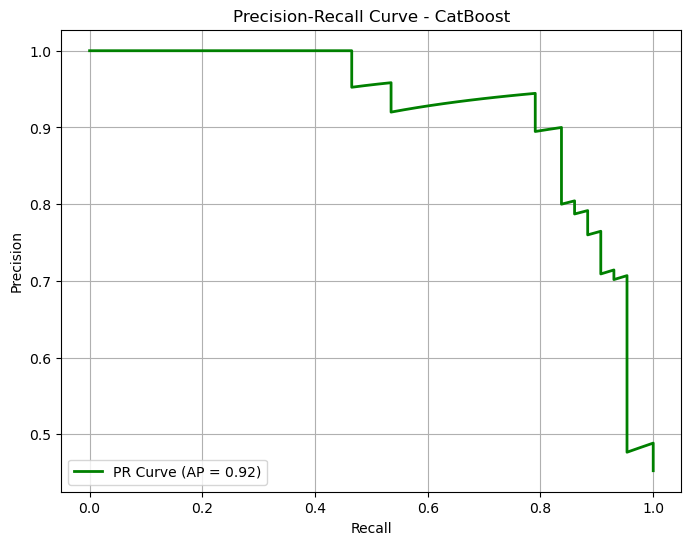

In [476]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  
y_prob = cat_clf.predict_proba(X_test)[:, 1] 
precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_prob)
average_precision = average_precision_score(y_test_encoded, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - CatBoost')
plt.legend(loc="lower left")
plt.grid()
plt.show()

### Artificial Neural Network (ANN)

              precision    recall  f1-score   support

      STRONG       0.85      0.88      0.87        52
        WEAK       0.85      0.81      0.83        43

    accuracy                           0.85        95
   macro avg       0.85      0.85      0.85        95
weighted avg       0.85      0.85      0.85        95

Train Accuracy: 0.9894
Test Accuracy: 0.8526


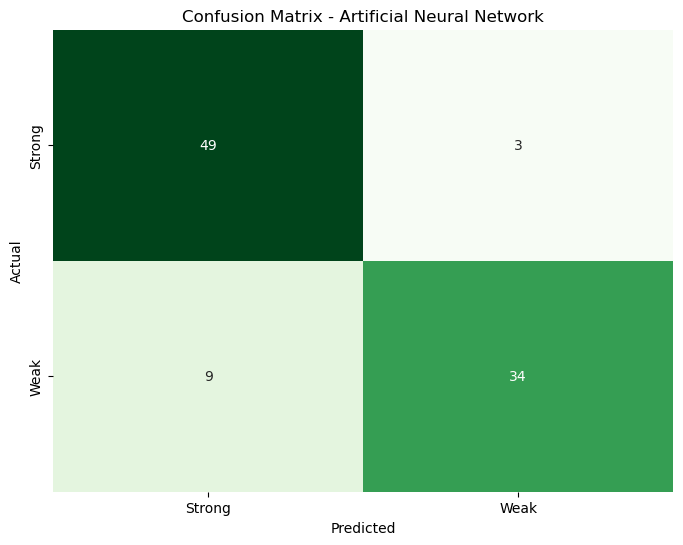

In [480]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ann_clf = MLPClassifier(hidden_layer_sizes=(120,70), max_iter=1000, random_state=22)
ann_clf.fit(X_train, y_train)

y_train_pred = ann_clf.predict(X_train)
y_test_pred = ann_clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(classification_report(y_test, y_test_pred))

print("Train Accuracy: {:.4f}".format(train_accuracy))
print("Test Accuracy: {:.4f}".format(test_accuracy))

# print(classification_report(y_test, y_pred))
# print("Train Accuracy: ", accuracy_score(y_train, ann_clf.predict(X_train)))
# print("Test Accuracy: ", accuracy_score(test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Strong', 'Weak'], yticklabels=['Strong', 'Weak'],cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Artificial Neural Network')
plt.show()

### Learning Curve

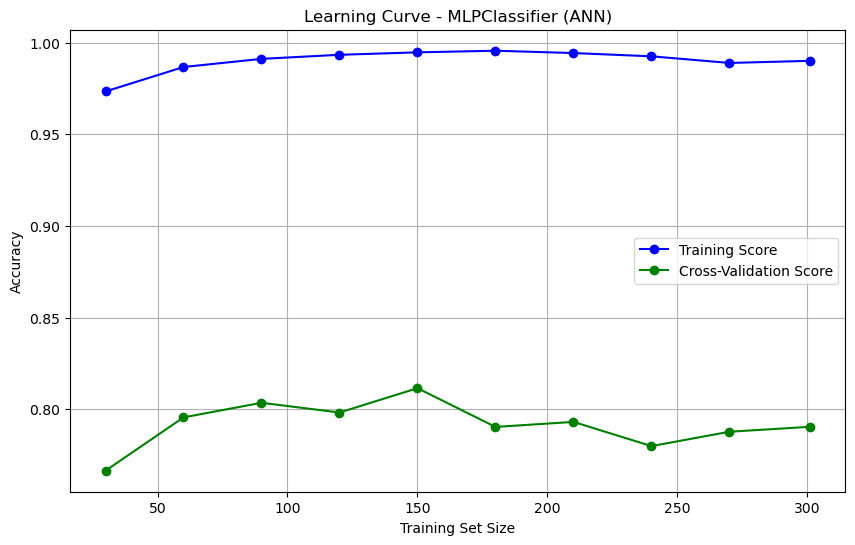

In [483]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score', color='green')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve - MLPClassifier (ANN)')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


plot_learning_curve(ann_clf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

### Loss Curve

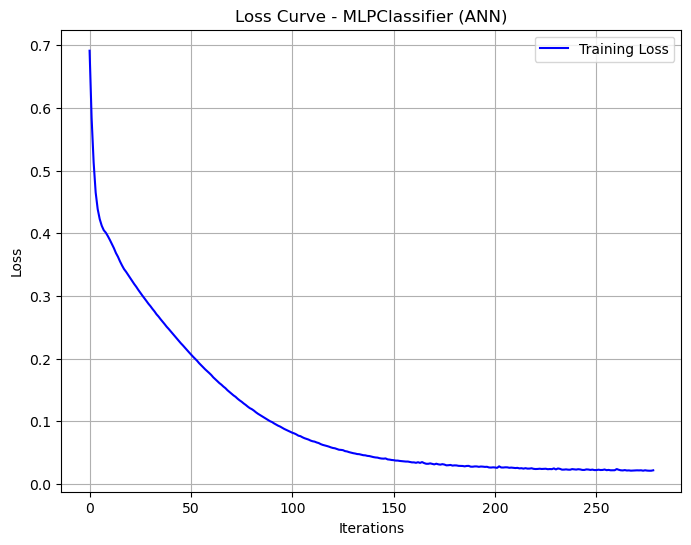

In [485]:
import matplotlib.pyplot as plt
#To plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(ann_clf.loss_curve_, label='Training Loss', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - MLPClassifier (ANN)')
plt.grid()
plt.legend()
plt.show()

### ROC Curve

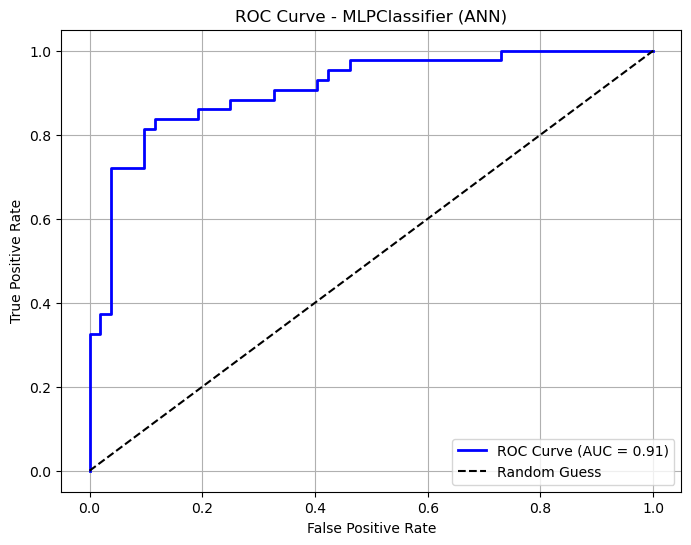

In [490]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test) 
y_prob = ann_clf.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = roc_auc_score(y_test_encoded, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLPClassifier (ANN)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Precision-Recall Curve

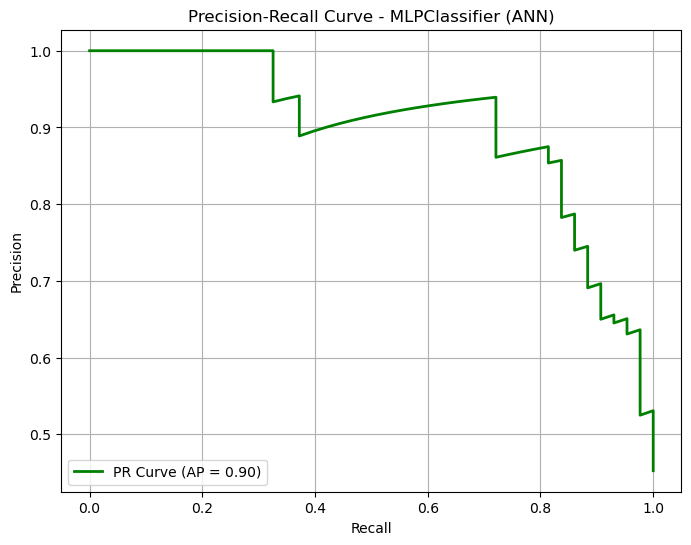

In [493]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  
y_prob = ann_clf.predict_proba(X_test)[:, 1] 
precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_prob)
average_precision = average_precision_score(y_test_encoded, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - MLPClassifier (ANN)')
plt.legend(loc="lower left")
plt.grid()
plt.show()

## ROC Curve Comparison

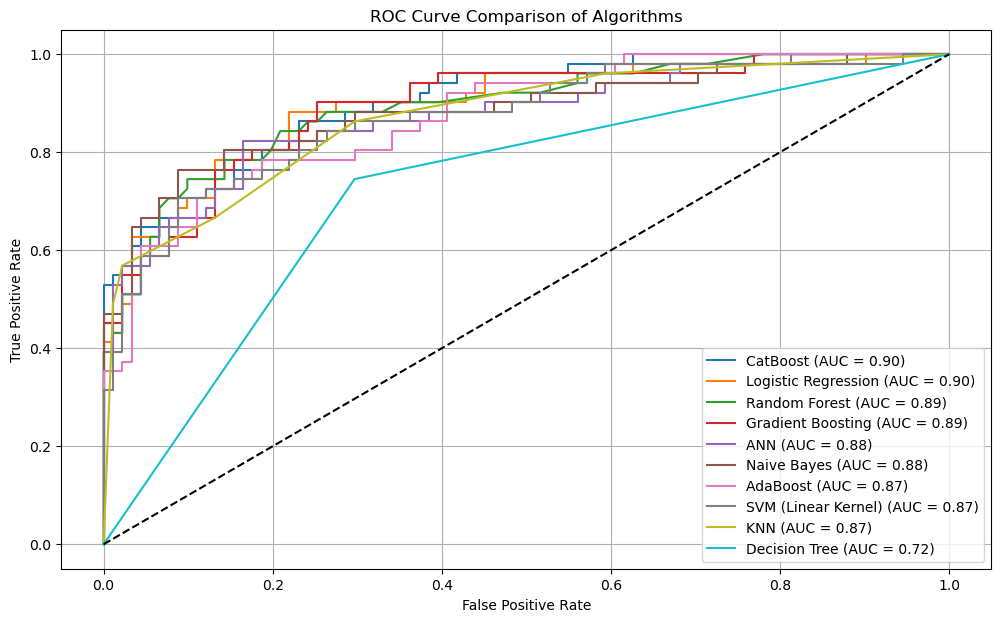

In [496]:
models = {
    "CatBoost": CatBoostClassifier(verbose=0),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "ANN": MLPClassifier(max_iter=300, random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM (Linear Kernel)": SVC(kernel="linear", probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    
}

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(12, 7))
for model_name, model in models.items():
    if model_name in ["SVM (Linear Kernel)", "ANN"]:
        X_train_input, X_test_input = X_train_scaled, X_test_scaled
    else:
        X_train_input, X_test_input = X_train, X_test

    model.fit(X_train_input, y_train)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_input)[:, 1]
    else:
        y_prob = model.decision_function(X_test_input)
    
    #Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.title("ROC Curve Comparison of Algorithms")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()